In [93]:
!pip install numpy==1.21.6 pandas==1.3.5 scikit-learn==1.0.2 pyLDAvis==2.1.2 matplotlib==3.5.3 jieba==0.42.1 pip install seaborn==0.11.0  # Example: Installing a specific version of Seaborn

!pip install tomotopy

In [94]:
!pip install xlsxwriter
!pip install matplotlib
!pip install wordcloud
!pip install snapshot-selenium
!pip install selenium
!pip install snownlp
!pip install openpyxl
!pip install pandas
!pip install little_mallet_wrapper
!pip install pyecharts
!pip install snapshot-pyppeteer


In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# data cleaning

In [117]:
import pandas as pd
import os
import re
from itertools import chain
import xlsxwriter


isnull = lambda x : True if len(str(x).strip())==0 \
                or (str(x).lower() in ['nan', 'none', r'\N', r'\n'])   \
                else False
                
notnull = lambda x : False if isnull(x) else True
extend_list = lambda x : list(chain(*x))
def cut_sent(para):
    import re
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([\.!。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('([\.!。！？\?][”’])([^\.!，。！？\?])', r'\1\n\2', para)
    para = para.rstrip()  

    return para.split("\n")

def read_from_dir(path, line_split=False):
    test_file = os.listdir(path)
    list_file = []
    for file in test_file:
        temp =  read_txt(os.path.join(path, file), line_split)
        temp = [xx.strip() for xx in temp]
        if not line_split:
            list_file.append([file, ' '.join(temp)])
        else:
            for i in range(len(temp)):
                list_file.append([file+'_'+str(i), temp[i]])
    return list_file   
def read_txt(path, line_split=True):
    try:
        with open(path, encoding = 'utf-8') as f:
            l = [x.strip() for x in f.readlines() if len(x.strip())!=0]
    except:
        with open(path, encoding='gbk') as f:
            l = [x.strip() for x in f.readlines() if len(x.strip())!=0]
    
    if line_split:
        return l
    else:
        return [' '.join(l)]


def have_chinese(ss):
    for s in ss:
        if s >= u'\u4e00' and s<=u'\u9fa5':
                return True
    return False 

def all_chinese(ss):
    for s in ss:
        if not((s >= u'\u4e00' and s<=u'\u9fa5')):
                return False
    return True

def word_filter(s):
    if len(s)<2:
        return False
    
    if not all_chinese(s.replace(' ', '')):
        return False
        
    if s.split(' ')[0] in stopwords:
        return False
    
    if s.split(' ')[-1] in stopwords:
        return False
        
    return True


def filter_text(s):
    if len(s.strip())<5:
        return False
    if not have_chinese(s.strip()):
        return False
    return True

def remove_aite(text):
    text = re.sub(r"@[^\s]*\s", "", text)
    text = re.sub(r"@[^\s]*$", "", text)
    text = re.sub(r"#[^#]*#", "", text)
    text = re.sub(r"【[^】【]*】", "", text)

    list_replace = ['★', 'з', '」', '∠', '/ω\\','(',')']
    for xx in list_replace:
        text = text.replace(xx, '')


    return text

In [118]:
def remove_emojis(desstr, restr=''):
    try:
        co = re.compile(u'[\U00010000-\U0010ffff]')
    except re.error:
        co = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
    return co.sub(restr, desstr)


def remove_whitespace(text):
    # 删除空格
    import re
    text = re.sub(r"\s+", " ", text)
    return text

def DBC2SBC(ustring):
    # 全角转半角
    rstring = ""
    for uchar in ustring:
        inside_code = ord(uchar)
        if inside_code == 0x3000:
            inside_code = 0x0020
        else:
            inside_code -= 0xfee0
        if not (0x0020 <= inside_code and inside_code <= 0x7e):
            rstring += uchar
            continue
        rstring += chr(inside_code)
    return rstring



In [119]:
df['text'] = df.apply(lambda x : str(x['text']).strip().lower(), axis=1)
df['text']  = df.apply(lambda x : DBC2SBC(x['text']), axis=1)
df['text'] = df.apply(lambda x : remove_whitespace(x['text']), axis=1)
df['text'] = df.apply(lambda x : remove_aite(x['text']), axis=1)
df['text'] = df.apply(lambda x : remove_emojis(x['text']), axis=1)


df['flag'] = df.apply(lambda x :filter_text(x['text']), axis=1)
df = df[df['flag'] ]

list_text = list(df['text'])

In [120]:
df

,作者,标题,发布时间,点赞数量,评论数量,正文,text,flag
0,罗密欧酱,美国队长-审判1,2014-06-20,14059,141,1.在摧毁了九头蛇的最后一个据点后，他们带走了Bucky。Steve被支开，等他发现不对劲再...,"1.在摧毁了九头蛇的最后一个据点后,他们带走了bucky。steve被支开,等他发现不对劲再...",True
1,罗密欧酱,美国队长-审判2,2014-06-20,12575,293,BGM：God Is An Astronaut-Golden Sky13.Bucky被判刑三...,bgm:god is an astronaut-golden sky13.bucky被判刑三...,True
2,小茶杯里有什么,【多cp】当你和恋人在街上遇到劫匪,2019-08-22,3506,82,沙雕段子预警#ooc预警#让我们来发糖吧！！！(/ω＼)🍬🍬🍬【锤基】“别动！打劫！！！”洛...,"沙雕段子预警让我们来发糖吧!!!“别动!打劫!!!”洛基刚准备优雅地抽出他的一对小匕首,去商...",True
3,克拉德美索,【盾冬】合法婚姻（1-2）,2016-05-31,4045,37,改编自苏联电影《合法婚姻》，假设美国同性婚姻于40年代已经合法化。双向暗恋梗，正剧向，HE。...,"改编自苏联电影《合法婚姻》,假设美国同性婚姻于40年代已经合法化。双向暗恋梗,正剧向,he。...",True
4,七花七夕,【盾冬】爱人是碰不得的（万字的小甜饼，一发完）,2018-06-15,3196,49,迟到的祝最帅的桃先生生日快乐！暗戳戳的糖也是糖啊。盾冬就在AU的世界里甜甜甜甜，要当Stev...,"迟到的祝最帅的桃先生生日快乐!暗戳戳的糖也是糖啊。盾冬就在au的世界里甜甜甜甜,要当stev...",True
...,...,...,...,...,...,...,...,...
95,苏特,各取所需 6,2018-01-03,4907,231,当巴基和洛基意识到他们不过是史蒂夫和索尔获得幸福人生的绊脚石时，他们决定各取所需，宣布交往。...,"当巴基和洛基意识到他们不过是史蒂夫和索尔获得幸福人生的绊脚石时,他们决定各取所需,宣布交往。...",True
96,DUbai萨拉,【复仇者联盟3】复联幼儿园日常(七),2018-05-22,3170,199,涉及cp预警:盾冬;锤基;微幻红无脑小甜饼设定大概是大战中死去的英雄们在复活过程中出了点小差...,涉及cp预警:盾冬;锤基;微幻红无脑小甜饼设定大概是大战中死去的英雄们在复活过程中出了点小差...,True
97,纳兰妙殊,我的心曾破碎九次【1】,2016-05-24,4907,111,接《美国队长：内战》结尾剧情。HE。HE。HE。----------------------...,接《美国队长:内战》结尾剧情。he。he。he。----------------------...,True
98,纳兰妙殊,私人同人文目录,2017-08-25,21860,460,为大家阅读方便，把自己写过的同人文整理如下。★Stucky长篇（已完结）：【你眼中的冰雪】1...,"为大家阅读方便,把自己写过的同人文整理如下。stucky长篇已完结:1-1516-2425-...",True


# tfi-df words

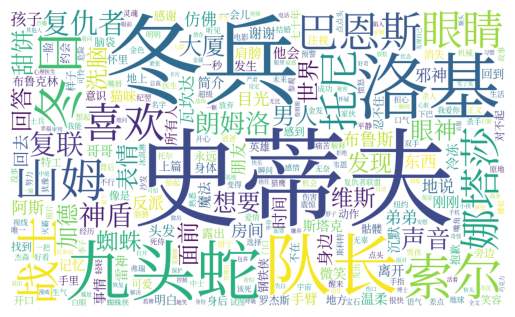

In [121]:
import jieba.analyse
import matplotlib.pyplot as plt

font_path = "./SourceHanSerifCN-Regular.otf"

topk = 10000
word_tfidf = jieba.analyse.extract_tags(' '.join(list_text), topK=topk, withWeight=True)
word_tfidf = [[x[0], x[1]] for x in word_tfidf]
dict_word_tfidf = {x:y for x,y in word_tfidf}
df_wordtfidf = pd.DataFrame(word_tfidf, columns=['word', 'tfidf'])
df_wordtfidf = df_wordtfidf.sort_values(by='tfidf', ascending=False)

df_wordtfidf['flag'] = df_wordtfidf.apply(lambda x :word_filter(x['word']), axis=1)
df_wordtfidf = df_wordtfidf[df_wordtfidf['flag'] ]
df_wordtfidf = pd.DataFrame(df_wordtfidf, columns=['word', 'tfidf'])
df_wordtfidf.to_excel('/Users/zhanghanyue/Desktop/wordstfidf.xlsx', index=False)


dict_word_tfidf = {x:y for x, y in zip(list(df_wordtfidf['word']), list(df_wordtfidf['tfidf']))}
my_cloud = WordCloud(width=1000, height=600, max_words=300,
    background_color='white', font_path=font_path, random_state=50
    ).generate_from_frequencies(dict_word_tfidf)
my_cloud.to_file('/Users/zhanghanyue/Desktop/tfidf_word_cloud.png')

plt.imshow(my_cloud)
plt.axis("off")
plt.show()

# topic modeling

In [122]:
import jieba
import tomotopy as tp
import re

def read_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file]
    return stopwords

# 加载停用词
stopwords = read_txt("/Users/zhanghanyue/Desktop/stopwords.txt")

import jieba.posseg as pseg

meaningless_entities = ['nr','ns', 'm']

def tokenizer(text):
    text = str(text)
    words = pseg.cut(text)
    return [word for word, flag in words if word not in stopwords and len(word) > 1 and not re.match('^[a-zA-Z]+$', word) and flag not in ['nr', 'ns', 'm']]

corpus = tp.utils.Corpus()
if 'text' in df.columns:
    texts = df['text'].astype(str)
else:
    print("Column 'text' not found, using the second last column instead.")
    texts = df.iloc[:, -2].astype(str)
for text in texts:
    corpus.add_doc(tokenizer(text))

In [123]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for document in corpus:
    model.add_doc(document)  

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -10.434731753487418
Iteration: 10	Log-likelihood: -10.242766471745705
Iteration: 20	Log-likelihood: -10.168947315053083
Iteration: 30	Log-likelihood: -10.092177995961727
Iteration: 40	Log-likelihood: -10.056831172645529
Iteration: 50	Log-likelihood: -10.032007026370453
Iteration: 60	Log-likelihood: -10.011061125049554
Iteration: 70	Log-likelihood: -9.992575083258235
Iteration: 80	Log-likelihood: -9.977003429111743
Iteration: 90	Log-likelihood: -9.954887698619562


In [124]:
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"Topic{topic_number} {topic_words}\n")

Topic0 简介 邪神 朋友 关系 解决 唯一 沉默 故事 明明 脖子

Topic1 山姆 头发 眼睛 表情 神盾局 刚刚 晚上 回头 当年 小声

Topic2 发现 世界 发生 离开 地方 感到 消失 担心 记忆 动作

Topic3 声音 时间 回答 身边 仿佛 回到 找到 微笑 身体 地上

Topic4 孩子 胳膊 女人 不行 参观 小孩 男孩 儿子 怀里 人群

Topic5 甜饼 可爱 厕所 爱情 喜欢 幸福 局长 吧唧 男神 系列

Topic6 男人 上篇 总裁 公司 可怕 视频 杀手 男朋友 厉害 证明

Topic7 队长 冷冻 目光 旁边 露出 冬兵 醒来 感情 姑娘 追求

Topic8 喜欢 想要 房间 眼睛 手臂 意识 眼神 脑袋 身后 忍不住

Topic9 战士 冬日 九头蛇 朗姆洛 娜塔莎 机械 表情 金属 理解 活着

Topic10 永远 洗脑 痛苦 杀人 力量 资料 放弃 选择 伤害 审判

Topic11 世界 结婚 战争 预警 灵魂 反派 生活 楼上 超级 长官

Topic12 九头蛇 骷髅 医生 报告 战场 士兵 面前 炸弹 人质 名著

Topic13 大厦 面前 事情 复仇者 加德 复联 感谢 学生 训练 博士

Topic14 洛基 弟弟 蜘蛛 维斯 魔法 喜欢 复仇者 阿斯 钢铁侠 猫咪



In [18]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.07190813,
 0.013172873,
 0.017883955,
 0.09809602,
 0.004224348,
 0.019335024,
 0.022042127,
 0.4168754,
 0.054191697,
 0.033590216,
 0.009171648,
 0.1246,
 0.068560585,
 0.028698089,
 0.01764987]

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 转换成 DataFrame，更易于处理和可视化
df_topic_distributions = pd.DataFrame(topic_distributions, columns=[f'Topic {i+1}' for i in range(15)])

# 查看 DataFrame
print(df_topic_distributions.head())


    Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0  0.020602  0.057198  0.010767  0.038508  0.011266  0.010731  0.090132   
1  0.033094  0.060715  0.012907  0.058693  0.031163  0.003253  0.074131   
2  0.120473  0.029161  0.012466  0.073526  0.012146  0.014789  0.113368   
3  0.017313  0.040910  0.031279  0.130737  0.000600  0.015848  0.126973   
4  0.049713  0.044268  0.014460  0.055914  0.017149  0.008911  0.094681   

    Topic 8   Topic 9  Topic 10  Topic 11  Topic 12  Topic 13  Topic 14  \
0  0.000206  0.094931  0.142039  0.001180  0.024662  0.073078  0.066799   
1  0.000241  0.103619  0.129897  0.001070  0.042804  0.061311  0.035673   
2  0.131345  0.032878  0.059146  0.103540  0.086325  0.037026  0.115942   
3  0.000913  0.078943  0.071608  0.007578  0.081114  0.005580  0.191524   
4  0.021842  0.058614  0.068560  0.010264  0.044829  0.377051  0.077288   

   Topic 15  
0  0.357901  
1  0.351430  
2  0.057869  
3  0.199080  
4  0.056456  


/var/folders/1r/lgl71l_j0y5ccccbqx5mj37r0000gn/T/ipykernel_26163/3098212163.py:25: UserWarning: Glyph 19990 (\N{CJK UNIFIED IDEOGRAPH-4E16}) missing from current font.
  plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
/var/folders/1r/lgl71l_j0y5ccccbqx5mj37r0000gn/T/ipykernel_26163/3098212163.py:25: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from current font.
  plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
/var/folders/1r/lgl71l_j0y5ccccbqx5mj37r0000gn/T/ipykernel_26163/3098212163.py:25: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
/var/folders/1r/lgl71l_j0y5ccccbqx5mj37r0000gn/T/ipykernel_26163/3098212163.py:25: UserWarning: Glyph 27426 (\N{CJK UNIFIED IDEOGRAPH-6B22}) missing from current font.
  plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
/var/folders/1r/lgl71l_j0y5ccccbqx5mj37r0000gn/T/ipykernel_26163/3098212163.py:25: UserWarning: Glyph 29233 (\N{CJK UNIFIED IDEOGRAPH-7231}) missing

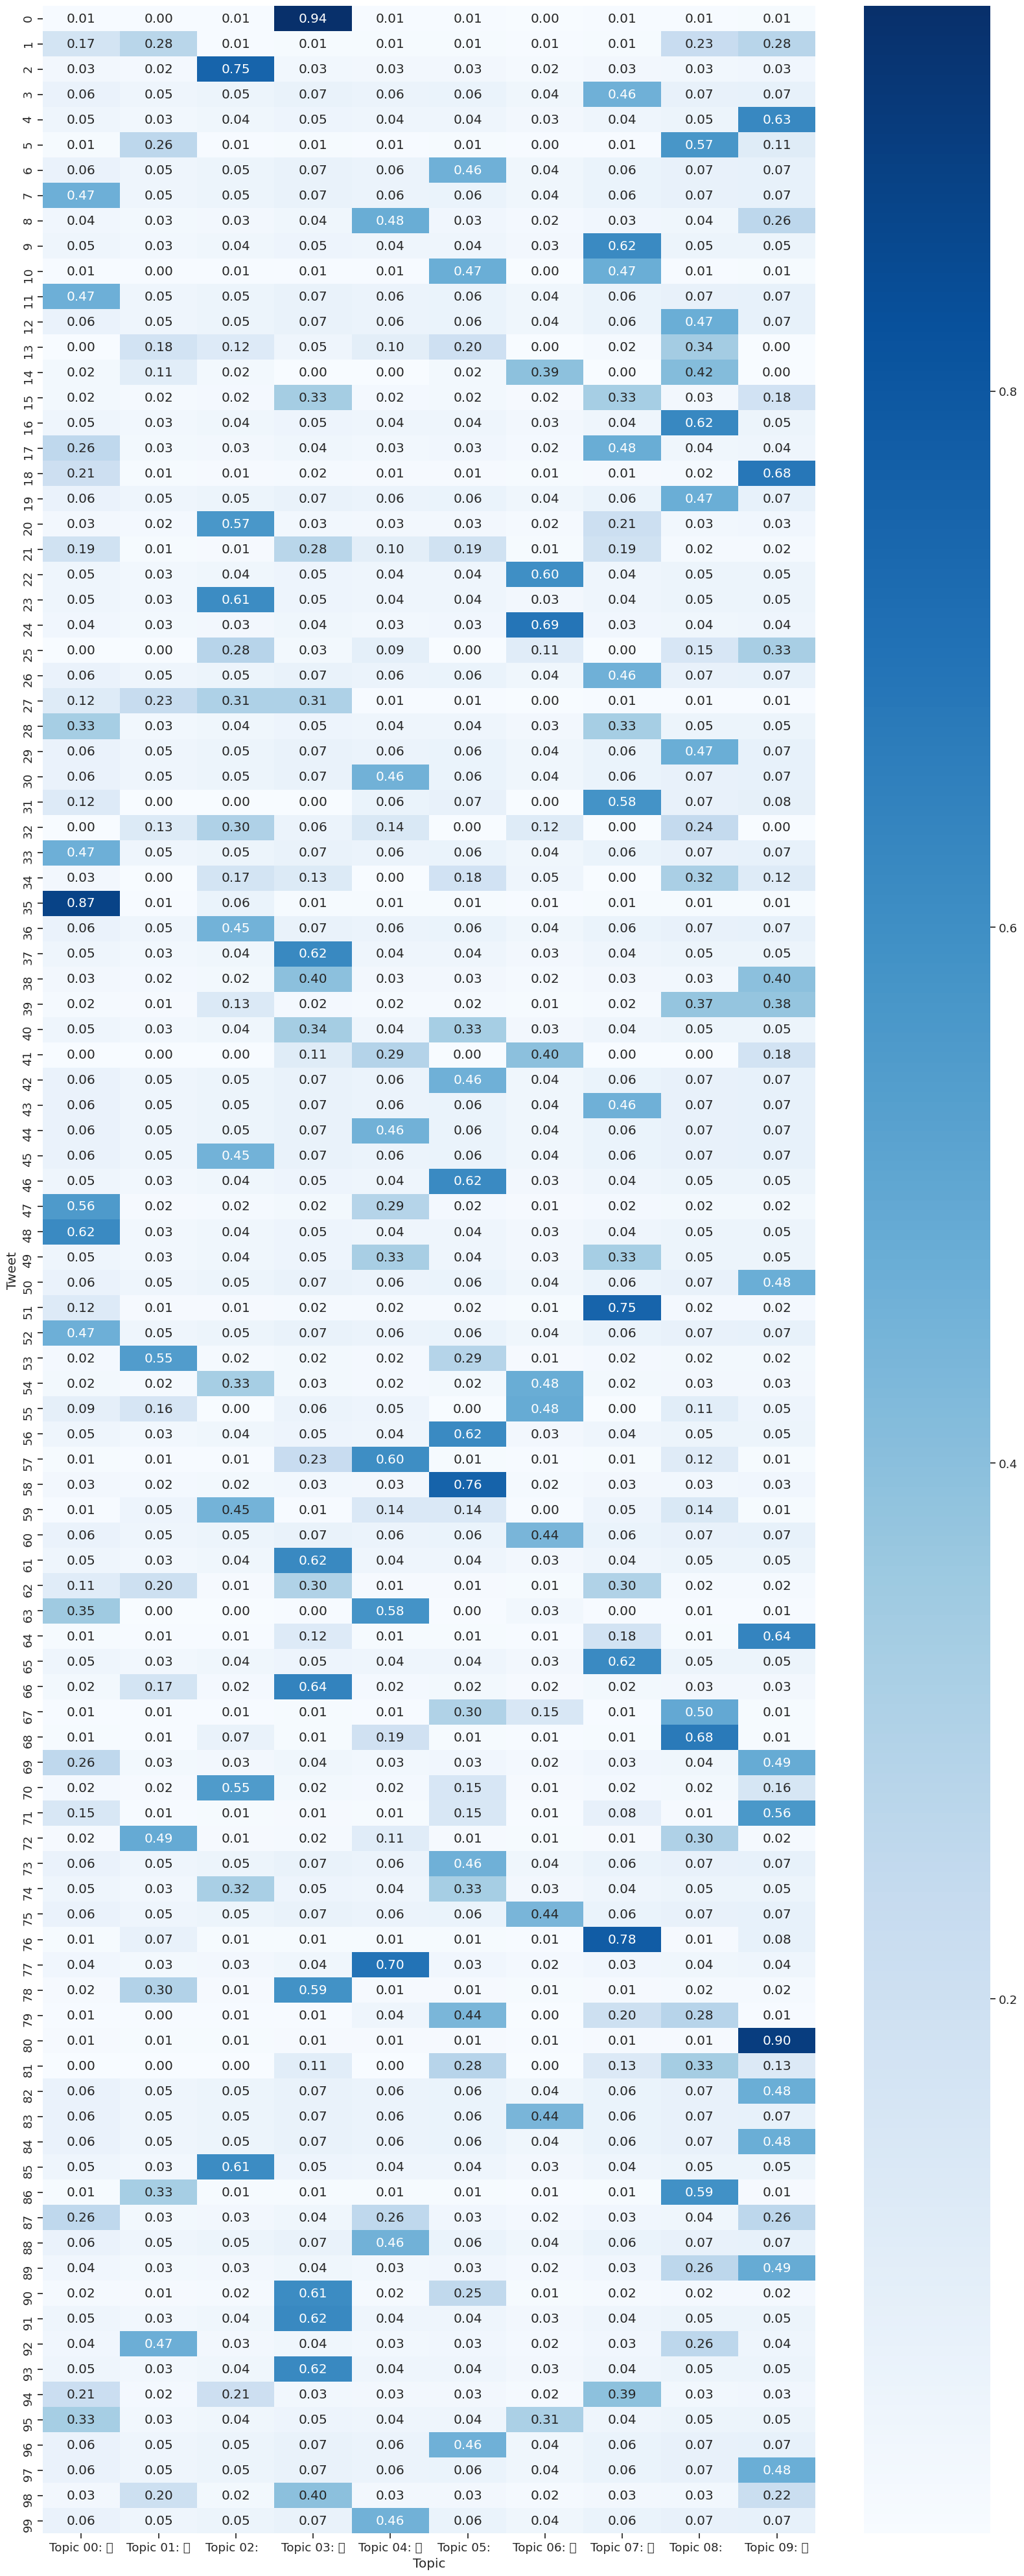

In [372]:
def plot_categories_by_topics_heatmap(labels, topic_distributions, topic_keys, output_path=None, target_labels=None, color_map='Blues', dim=(16, 40)):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    dicts_to_plot = []
    index_counter = 0  


    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
   
            for _topic_index, _probability in enumerate(_distribution):
                topic_description = 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join([str(word) for word in topic_keys[_topic_index][:5]])
                dicts_to_plot.append({'Probability': float(_probability), 'Tweet': index_counter, 'Topic': topic_description})
        index_counter += 1  


    df_to_plot = pd.DataFrame(dicts_to_plot)
    pivot_table = df_to_plot.pivot("Tweet", "Topic", "Probability")
    pivot_table = pivot_table.fillna(0) 

    plt.figure(figsize=dim)
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=color_map)
    plt.tight_layout()  
    
 
    if output_path:
        plt.savefig(output_path)
    plt.show()


plot_categories_by_topics_heatmap(
    labels=target_labels,
    topic_distributions=topic_distributions,
    topic_keys=topic_words,
    output_path='/Users/zhanghanyue/Desktop/heatmap.png',  
    target_labels=target_labels,
    color_map='Blues',
    dim=(16,40)
)


# Sentiment Analysis

In [125]:
import snownlp

def sentiment_snownlp_zh(sentence):
    score = snownlp.SnowNLP(sentence).sentiments
    if (score<0.6) and (score>0.4):
        all_polarity = 'neu'
        all_score = (score-0.5)
    elif score>=0.6:
        all_polarity = 'pos'
        all_score =  (score-0.5)*2
    else:
        all_polarity = 'neg'
        all_score =  (score-0.5)*2

    return all_polarity, all_score
df['sentiment tendency'], df['sentiment score'] = \
    zip(*df.apply(lambda x : sentiment_snownlp_zh(x['text']), axis=1))


def fre(text, list_neg, list_pos):
    list_word = tokenizer(str(text))
    list_p = []
    list_n = []
    pos = 0
    neg = 0
    all = len(list_word)
    for w in list_word:
        if w in list_neg:
            neg += 1
            list_n.append(w)
        if w in list_pos:
            pos += 1
            list_p.append(w)
    return ' '.join(list(set(list_p))), pos, ' '.join(list(set(list_n))), neg, all-pos-neg


df['Positive words in the text'], df['Positive words count'], df['Negative words in the text'], df['Negative words count'], df['Neutral words count'] = zip(*df.apply(lambda x : fre((x['text']), list_neg, list_pos), axis=1))


In [126]:
df.to_excel('/Users/zhanghanyue/Desktop/sentiment analysis result.xlsx', index=False)

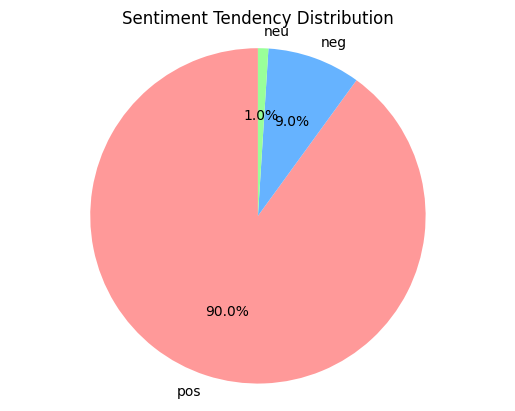

In [127]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('/Users/zhanghanyue/Desktop/sentiment analysis result.xlsx', engine='openpyxl')


tendency_counts = df['sentiment tendency'].value_counts()


fig, ax = plt.subplots()
ax.pie(tendency_counts, labels=tendency_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.title('Sentiment Tendency Distribution')


plt.savefig('/Users/zhanghanyue/Desktop/sentiment_pie_chart.png')


plt.show()


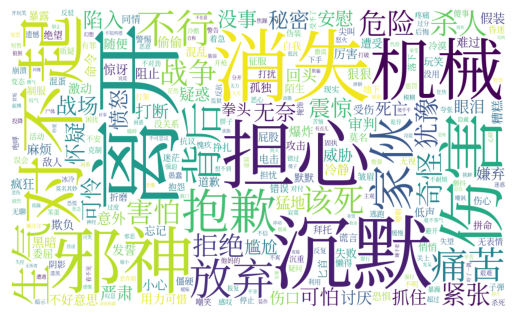

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.colors as colors


cv = CountVectorizer(analyzer='word', tokenizer=tokenizer, vocabulary=list(list_neg), ngram_range=(1, 1))
fre_matrix = cv.fit_transform(list(df['text'])).toarray()
fre_matrix = np.sum(fre_matrix, axis=0).tolist()
word_fre = [[x, y] for x,y in zip(cv.get_feature_names_out(), fre_matrix)]
dict_word_fre = {x:y for x,y in word_fre}
df_wordfre = pd.DataFrame(word_fre, columns=['word', 'frequency'])
df_wordfre = df_wordfre.sort_values(by='frequency', ascending=False)

df_wordfre['flag'] = df_wordfre.apply(lambda x :word_filter(x['word']), axis=1)
df_wordfre = df_wordfre[df_wordfre['flag'] ]

df_wordfre = pd.DataFrame(df_wordfre, columns=['word', 'frequency'])

df_wordfre.to_excel('/Users/zhanghanyue/Desktop/Negative word frequency statistics.xlsx', index=False)


dict_word_fre = {x:y for x, y in zip(list(df_wordfre['word']), list(df_wordfre['frequency'])) }
my_cloud = WordCloud(width=1000, height=600, max_words=300, 
                    background_color='white', font_path=font_path, random_state=50).generate_from_frequencies(dict_word_fre)
my_cloud.to_file(os.path.join('/Users/zhanghanyue/Desktop/Negative word frequency word cloud map.png'))

plt.imshow(my_cloud)
plt.axis("off")
plt.show()


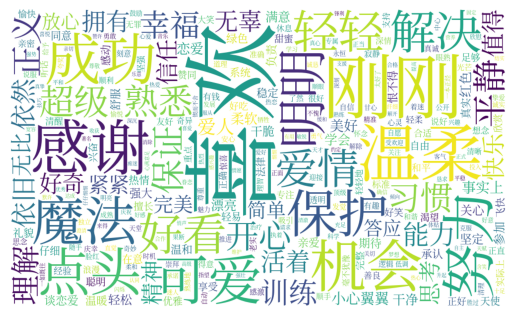

In [38]:

cv = CountVectorizer(analyzer='word', tokenizer=tokenizer, vocabulary=list(list_pos), ngram_range=(1, 1))
fre_matrix = cv.fit_transform(list(df['text'])).toarray()
fre_matrix = np.sum(fre_matrix, axis=0).tolist()
word_fre = [[x, y] for x,y in zip(cv.get_feature_names_out(), fre_matrix)]
dict_word_fre = {x:y for x,y in word_fre}
df_wordfre = pd.DataFrame(word_fre, columns=['word', 'frequency'])
df_wordfre = df_wordfre.sort_values(by='frequency', ascending=False)

df_wordfre['flag'] = df_wordfre.apply(lambda x :word_filter(x['word']), axis=1)
df_wordfre = df_wordfre[df_wordfre['flag'] ]

df_wordfre = pd.DataFrame(df_wordfre, columns=['word', 'frequency'])

df_wordfre.to_excel('/Users/zhanghanyue/Desktop/Active word frequency statistics.xlsx', index=False)

dict_word_fre = {x:y for x, y in zip(list(df_wordfre['word']), list(df_wordfre['frequency']))}
my_cloud = WordCloud(width=1000, height=600, max_words=300, 
                    background_color='white', font_path=font_path, random_state=50
    ).generate_from_frequencies(dict_word_fre)
my_cloud.to_file('/Users/zhanghanyue/Desktop/Active word frequency word cloud map.png')

plt.imshow(my_cloud)
plt.axis("off")
plt.show()
